#### Set Up

In [1]:
import pandas as pd

def read_data(file_path_train, file_path_test):
	train_df = pd.read_csv(file_path_train)
	test_df = pd.read_csv(file_path_test)
	return train_df, test_df

In [2]:
train_df, test_df = read_data("../data/modified_train.csv", "../data/test.csv")

## Data Exploration
- Test 1: Data Characteristics
    - Shape, size, dtypes, and meaning of each line.
    - Datatype of each numerical column.
    - Duplicated rows, missing values, and unique values.
- Test 2: Stats
    - Min, Max, Mean, Median, and Mode
    - Q1 and Q3
    - Standard Deviation and Variance
- Test 3: Distribution and Outliner Analysis
- Test 4: Correalation Analysis
- Test 5: Other
### Test 1 - Data Characteristics

In [3]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
print(f"Shape of train_df: {train_df.shape}\n")
print(f"Labels of train_df columns:\n{train_df.columns}\n")
print(f"Data types of train_df columns:\n{train_df.dtypes}\n")

Shape of train_df: (11430, 12)

Labels of train_df columns:
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

Data types of train_df columns:
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object



In [5]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
print(f"Shape of test_df: {test_df.shape}\n")
print(f"Labels of test_df columns:\n{test_df.columns}\n")
print(f"Data types of test_df columns:\n{test_df.dtypes}\n")

Shape of test_df: (6493, 9)

Labels of test_df columns:
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

Data types of test_df columns:
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object



#### Classification
| Column      | Data Type  |
|-------------|------------|
| datetime    | Time-seires     |
| season      | Nominal      |
| holiday     | Binary      |
| workingday  | Binary      |
| weather     | Ordinal      |
| temp        | Nominal    |
| atemp       | Nominal    |
| humidity    | Nominal      |
| windspeed   | Nominal    |
| casual   | Nominal    |
| registered   | Nominal    |
| count   | Nominal    |

#### Uniqueness, NA-Values and Duplication

In [7]:
for col in ['season', 'holiday', 'workingday', 'weather']:
    counts = train_df[col].value_counts()
    ratios = train_df[col].value_counts(normalize=True)
    summary_df = pd.DataFrame({'Count': counts, 'Ratio': round(ratios, 2)})
    print(f"{summary_df}\n")

        Count  Ratio
season              
4        2880   0.25
3        2878   0.25
2        2859   0.25
1        2813   0.25

         Count  Ratio
holiday              
0        11102   0.97
1          328   0.03

            Count  Ratio
workingday              
1            7761   0.68
0            3669   0.32

         Count  Ratio
weather              
1         7541   0.66
2         2981   0.26
3          907   0.08
4            1   0.00



In [8]:
train_df_rows_na = train_df[train_df.isna().any(axis=1)]
print(f'train_df rows w/ na-values: {len(train_df_rows_na)}')

train_df_na_ratio = train_df.isna().mean()
train_df_columns_na = train_df_na_ratio[train_df_na_ratio > 0]
print("Columns with NA values and their missing value ratio:")
for col, ratio in train_df_columns_na.items():
    print(f"{col}: {ratio:.1%}")

train_df rows w/ na-values: 3117
Columns with NA values and their missing value ratio:
temp: 10.0%
atemp: 10.0%
windspeed: 10.0%


In [9]:
train_df_rows_duplicated = train_df.duplicated()
train_df_rows_duplicated = train_df_rows_duplicated[train_df_rows_duplicated == True]
print(f'train_df rows w/ duplicated values: {len(train_df_rows_duplicated)}')

train_df rows w/ duplicated values: 288


In [10]:
duplicated_rows = train_df[train_df.duplicated()]

for col in train_df.columns:
    
    if col in ["season", "holiday", "workingday", "weather"]:
        print(duplicated_rows[col].value_counts())
        print()

season
3    77
4    76
1    74
2    61
Name: count, dtype: int64

holiday
0    280
1      8
Name: count, dtype: int64

workingday
1    178
0    110
Name: count, dtype: int64

weather
1    188
2     73
3     27
Name: count, dtype: int64



#### Test 2 - Stats

In [11]:
train_df_humidity = train_df['humidity']
print(f"Min: {train_df_humidity.min()}")
print(f"Max: {train_df_humidity.max()}")
print(f"Mean: {round(train_df_humidity.mean(), 2)}")
print(f"Median: {train_df_humidity.median()}")
print(f"Mode: {train_df_humidity.mode().iloc[0]}")
print(f"Q1: {train_df_humidity.quantile(q=0.25)}")
print(f"Q3: {train_df_humidity.quantile(q=0.75)}")
print(f"Variance: {round(train_df_humidity.var(), 2)}")
print(f"Standard Deviation: {round(train_df_humidity.std(), 2)}")

Min: 0
Max: 100
Mean: 61.88
Median: 62.0
Mode: 88
Q1: 47.0
Q3: 77.0
Variance: 370.89
Standard Deviation: 19.26


### Test 3 - Distribution & Outliner Analysis

#### Distribution

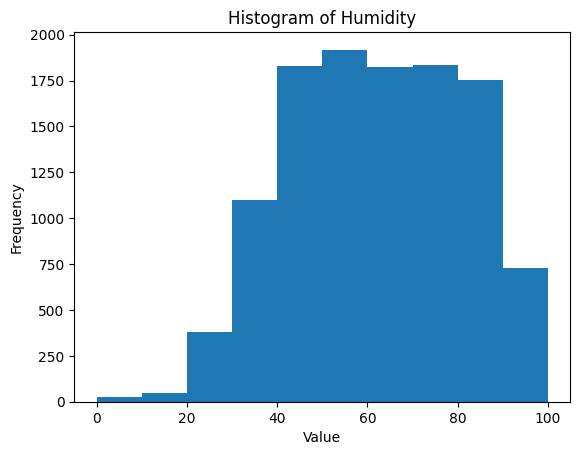

In [12]:
import matplotlib.pyplot as plt

plt.hist(train_df_humidity, bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Humidity')
plt.show()

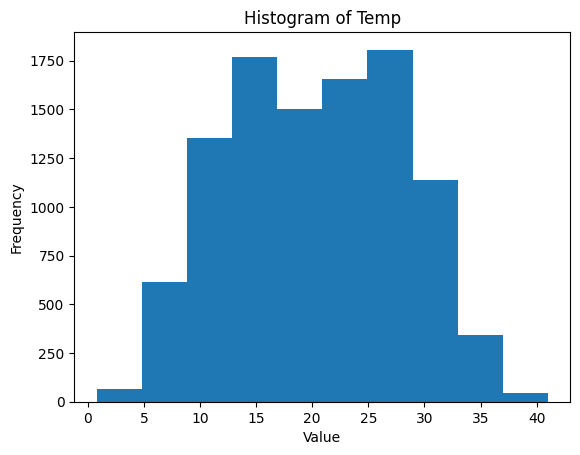

In [13]:
import matplotlib.pyplot as plt

plt.hist(train_df['temp'], bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Temp')
plt.show()

#### Test 4 - Correlation Analysis

In [17]:
train_df_num = train_df.drop('datetime', axis=1)
train_df_num.corr(method='spearman')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.030037,-0.011827,0.011136,0.249731,0.243910,0.190319,-0.131063,0.165955,0.177693,0.176691
holiday,0.030037,1.000000,-0.249989,-0.000690,0.009394,-0.006005,-0.000008,0.008605,0.027533,-0.013645,-0.003552
workingday,-0.011827,-0.249989,1.000000,0.026449,0.027143,0.029469,-0.007346,0.014249,-0.200605,0.062489,-0.000771
weather,0.011136,-0.000690,0.026449,1.000000,-0.057614,-0.064195,0.402608,-0.004386,-0.143793,-0.106753,-0.117915
temp,0.249731,0.009394,0.027143,-0.057614,1.000000,0.986918,-0.050562,0.003286,0.576327,0.352478,0.409476
atemp,0.243910,-0.006005,0.029469,-0.064195,0.986918,1.000000,-0.042522,-0.033986,0.568460,0.349012,0.404665
humidity,0.190319,-0.000008,-0.007346,0.402608,-0.050562,-0.042522,1.000000,-0.321005,-0.379145,-0.331276,-0.353100
windspeed,-0.131063,0.008605,0.014249,-0.004386,0.003286,-0.033986,-0.321005,1.000000,0.134268,0.127746,0.133078
casual,0.165955,0.027533,-0.200605,-0.143793,0.576327,0.568460,-0.379145,0.134268,1.000000,0.776296,0.847672
registered,0.177693,-0.013645,0.062489,-0.106753,0.352478,0.349012,-0.331276,0.127746,0.776296,1.000000,0.988983


In [18]:
train_df_num.corr(method='pearson')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029972,-0.011784,0.009240,0.260000,0.263068,0.194164,-0.147054,0.100344,0.164213,0.164562
holiday,0.029972,1.000000,-0.249989,-0.006346,0.008427,-0.007479,0.001679,0.009269,0.041749,-0.022835,-0.007527
workingday,-0.011784,-0.249989,1.000000,0.031637,0.026433,0.026532,-0.008642,0.008448,-0.319149,0.119639,0.011752
weather,0.009240,-0.006346,0.031637,1.000000,-0.054430,-0.057406,0.409507,0.009597,-0.140586,-0.111362,-0.131596
temp,0.260000,0.008427,0.026433,-0.054430,1.000000,0.984797,-0.067811,-0.012400,0.470698,0.319379,0.396083
atemp,0.263068,-0.007479,0.026532,-0.057406,0.984797,1.000000,-0.044095,-0.057336,0.460795,0.312744,0.387909
humidity,0.194164,0.001679,-0.008642,0.409507,-0.067811,-0.044095,1.000000,-0.314218,-0.350180,-0.264782,-0.317280
windspeed,-0.147054,0.009269,0.008448,0.009597,-0.012400,-0.057336,-0.314218,1.000000,0.093446,0.086667,0.097983
casual,0.100344,0.041749,-0.319149,-0.140586,0.470698,0.460795,-0.350180,0.093446,1.000000,0.498199,0.691019
registered,0.164213,-0.022835,0.119639,-0.111362,0.319379,0.312744,-0.264782,0.086667,0.498199,1.000000,0.971010
